In [1]:
!pip install mglearn

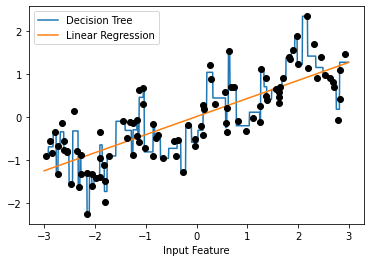

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import mglearn

X, y = mglearn.datasets.make_wave(n_samples = 100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="Linear Regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

In [3]:
# As you can see in the above model the Decision Tree Regression is a much powerful algorithm than Linear Regression therefore we use
# Decision Tree Regressor. To make the Linear Regression more powerful we can make use of the process called binning (discretization)
# which will split our input range into equally spaced intervals

bins = np.linspace(-3, 3, 11)
print("Bins: {}".format(bins))

Bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [4]:
# Now we will record for each data point which bin it falls into. This can be done using np.digitize function.

which_bin = np.digitize(X, bins=bins)
print("\nData Points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data Points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [7]:
# What we did here is tranform a single continouse feature into a categorical feature, that encodes which bin a data point is in.

# Now to use a scikit learn model on this data, we transform this discrete feature to a one-hot encoding using the OneHotEncoder from
# the preprocessing module. The OneHotEncoder works on Integer Feature rather than String Feature

from sklearn.preprocessing import OneHotEncoder

# Transforming using OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

# Transform create the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
print("X_binned shape: {}".format(X_binned.shape))

X_binned shape: (100, 10)


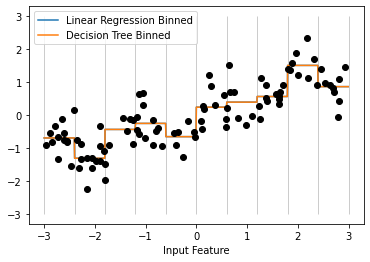

In [10]:
# Now we will build a new linear regression model and a new decision tree model on the one hot encoded data. This is visualized with 
# the help of the bin boundaries as black dotted lines

line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Linear Regression Binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Decision Tree Binned")


plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.xlabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")